In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load in the audio features df > organise into "sessions" which share the same date, mic and location
dataset_path = '../data/raw'
features_path = '../data/interim'
df = pd.read_csv(os.path.join(features_path, 'sample_meta_w_audio_features.csv'))

In [3]:
df['session_id'] = df.groupby(['date', 'microphone_id', 'location_id']).ngroup()

In [4]:
session_list = df['session_id'].unique()

In [5]:
def plot_rel_diff_by_col(df, col):
    abt = df.groupby(['session_id', 'subclass'])[[col]].mean().reset_index()
    session_list = abt['session_id'].unique()
    
    for i in session_list:
        # check for baseline/silence
        session = abt[abt['session_id'] == i].copy()
        unique_subs = session['subclass'].unique().tolist()
    
        if 0 in unique_subs:
            amb_mean = session.loc[session['subclass'] == 0, col].values[0]
            abt.loc[(abt['session_id'] == i), 'session_amb_mean'] = amb_mean
        
    abt['relative_diff'] = abs(round((abt['session_amb_mean'] - abt[col]) / abt['session_amb_mean'], 5))
    
    abt.groupby(['subclass'])['relative_diff'].mean().plot.bar()
    plt.title(f'Relative difference from ambient {col}')
    
    return plt.show()

###  Which type of aircraft contribute the most to the noise burden?

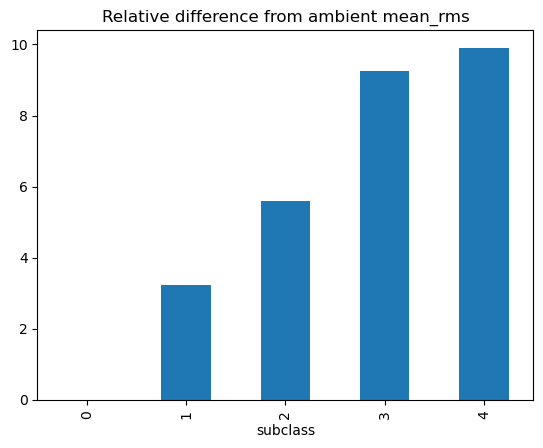

In [6]:
plot_rel_diff_by_col(df=df, col='mean_rms')

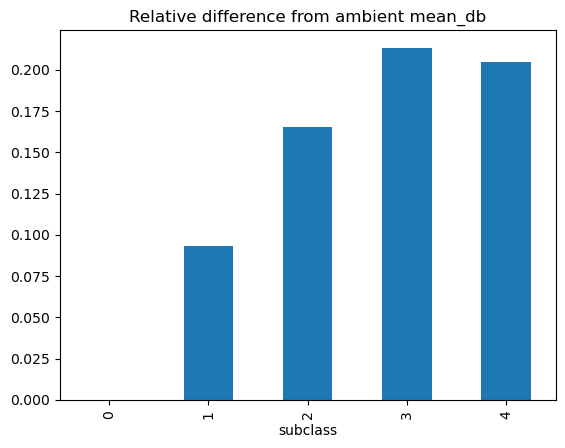

In [7]:
plot_rel_diff_by_col(df=df, col='mean_db')

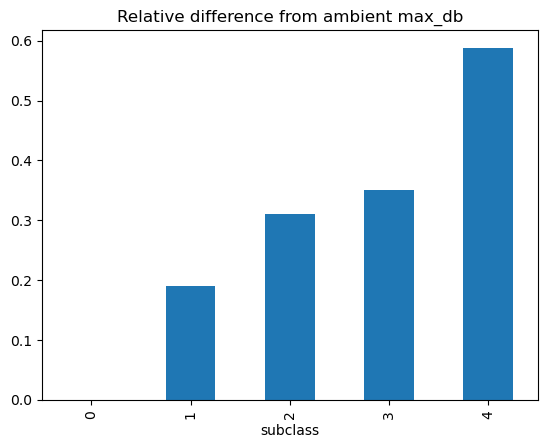

In [8]:
plot_rel_diff_by_col(df=df, col='max_db')